In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

In [2]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
Y = data.quality
X = data.drop('quality', axis=1)

## Data Visualization

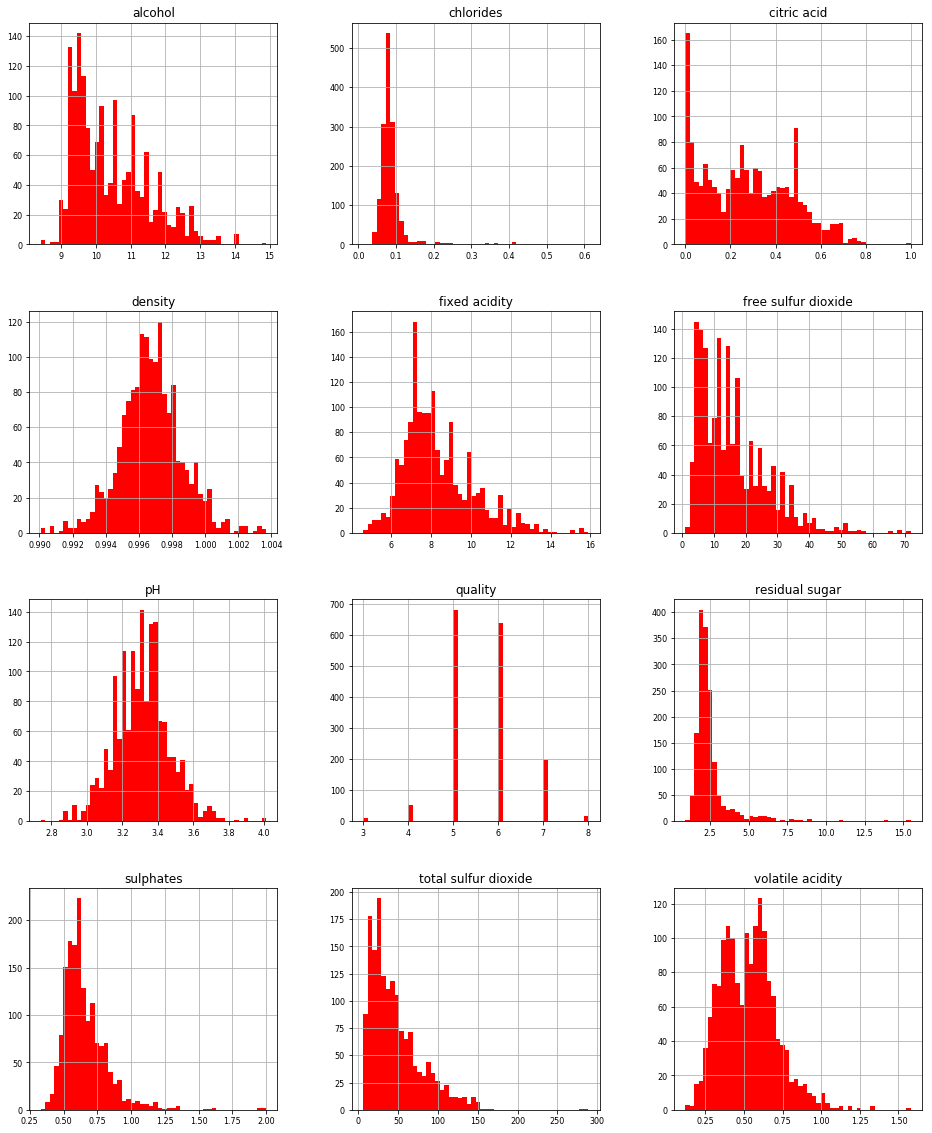

In [5]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='r');

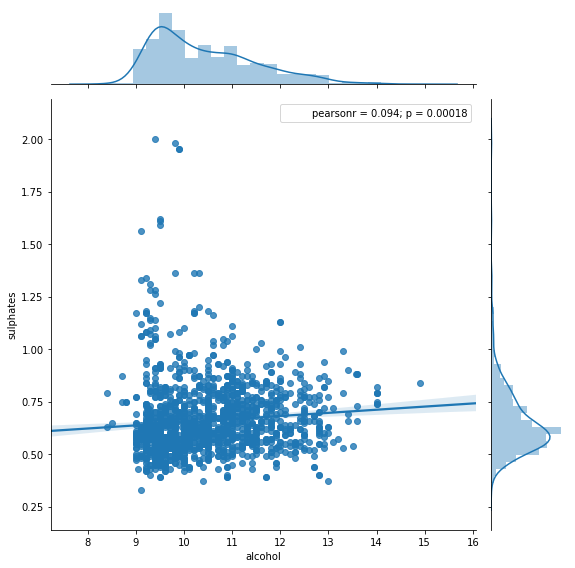

In [7]:
sns.jointplot(y='sulphates',x='alcohol', kind='reg', data=data, size=8)

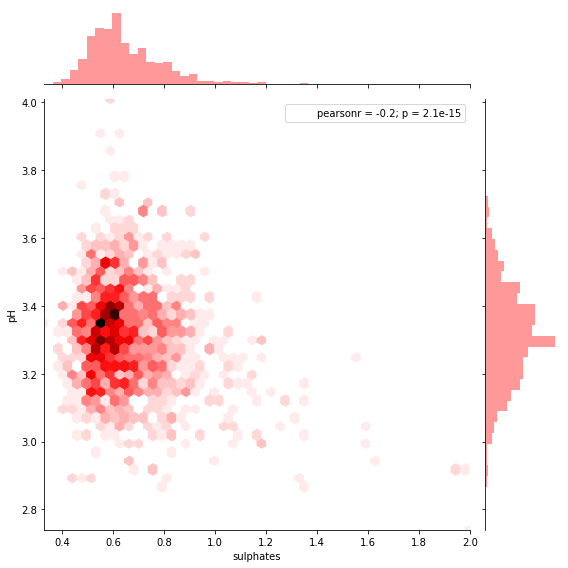

In [9]:
sns.jointplot(x = 'sulphates', y='pH', kind ='hex', data=data, color='r', size=8)

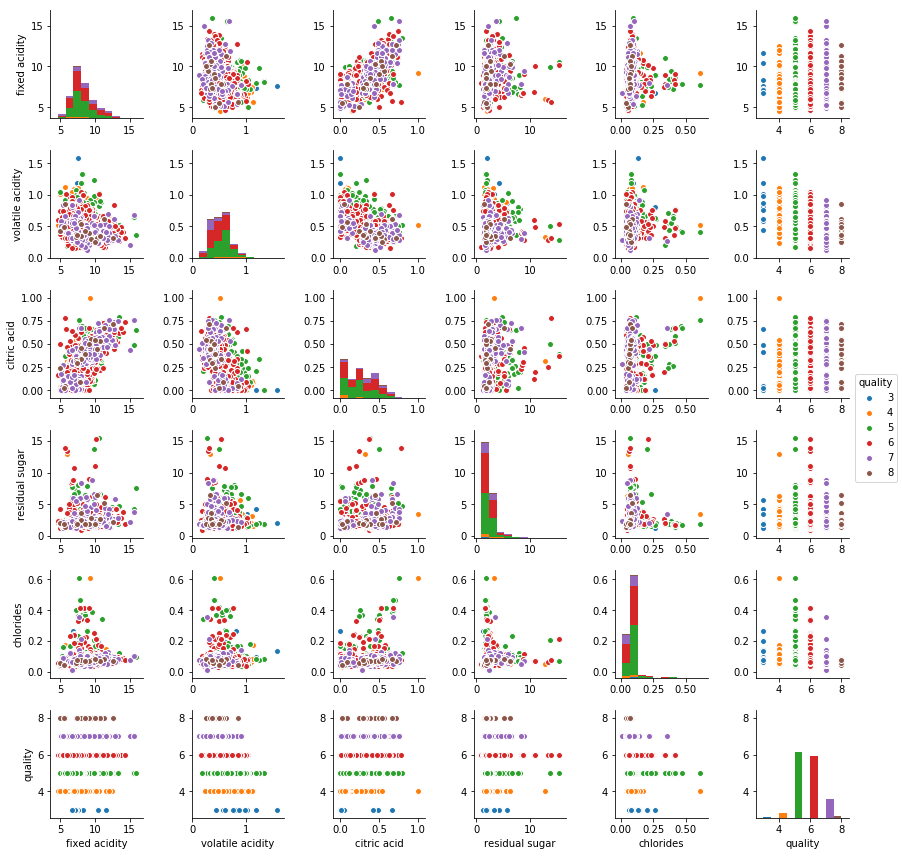

In [10]:
sns.pairplot(data.loc[:,["fixed acidity", "volatile acidity", "citric acid", "residual sugar",\
                         "chlorides", "quality"]], hue='quality', size=2)

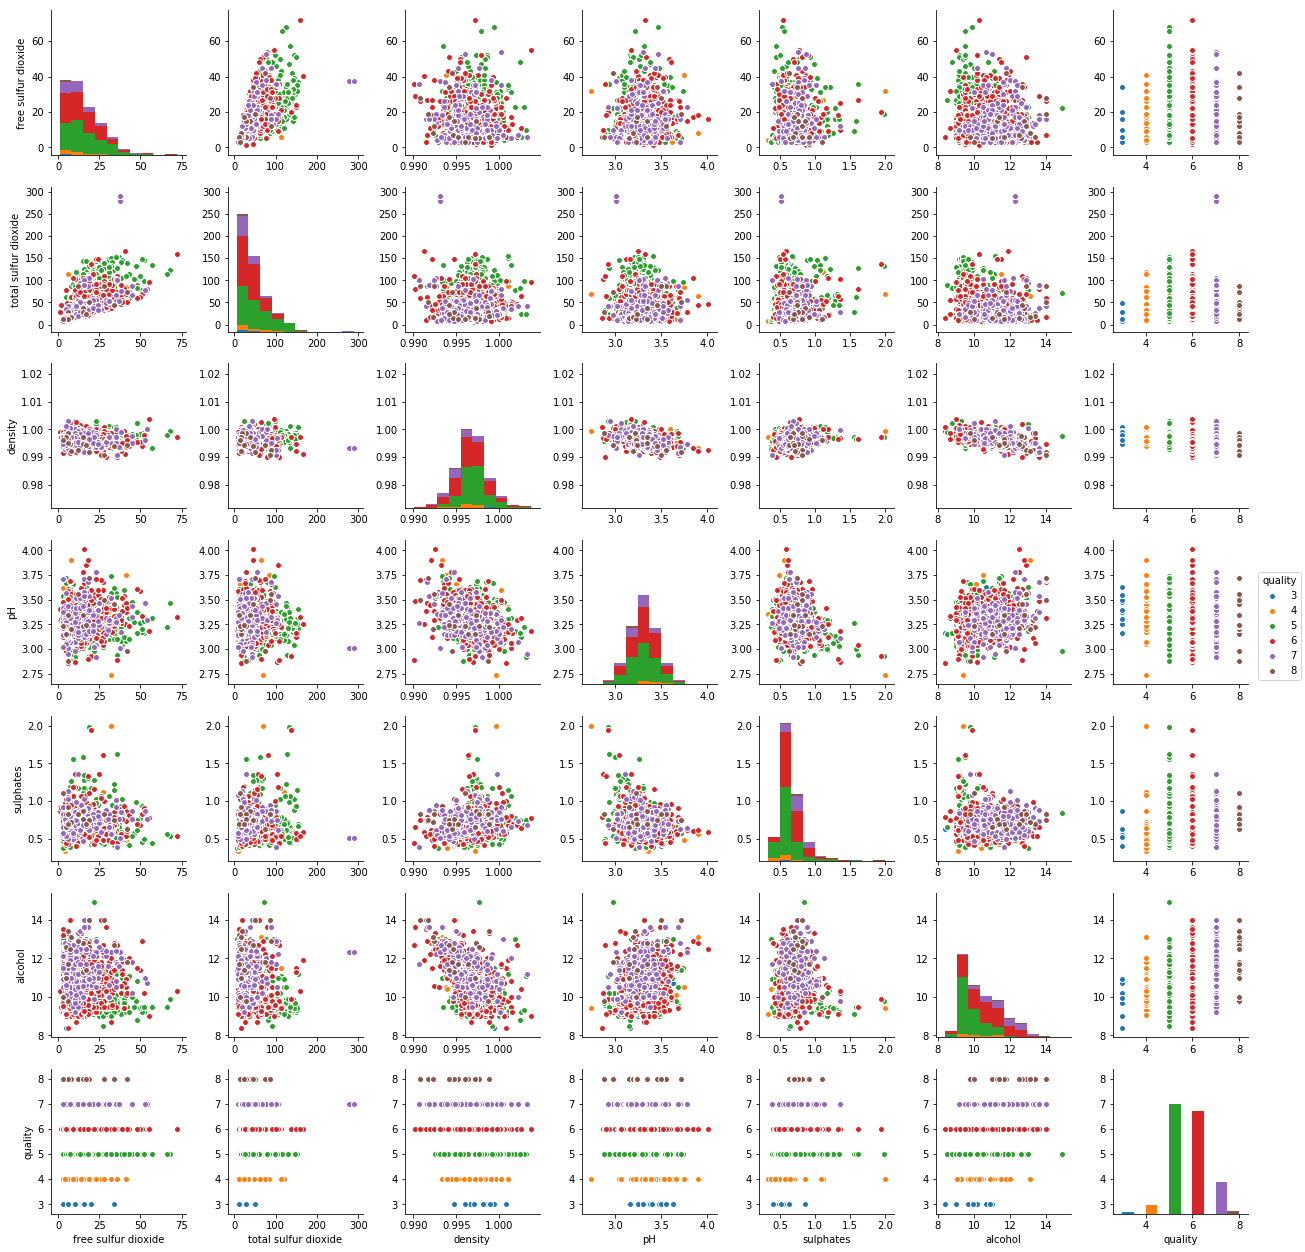

In [11]:
sns.pairplot(data.loc[:,['free sulfur dioxide', "total sulfur dioxide", "density", \
                      "pH", "sulphates", "alcohol", "quality"]], hue='quality')

## Fitting a Classifier

Check out this [link](https://medium.freecodecamp.org/using-machine-learning-to-predict-the-quality-of-wines-9e2e13d7480d) for more info

In [12]:
#Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
data['quality_categorical'] = pd.cut(data['quality'], bins=bins, labels=quality_labels, include_lowest=True)
#Displays the first 2 columns
display(data.head(n=2))
# Split the data into features and target label
X = data.drop(['quality', 'quality_categorical'], axis = 1)
Y = data['quality_categorical']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [13]:
#Split our data into training/testing sets: 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=123, stratify=Y)

In [14]:
#Sanity Check: 
print("Training Set (Features) Dimension: "+ str(X_train.shape))
print("Testing Set (Features) Dimension: "+ str(X_test.shape))
print("Training Set (Target) Dimension: "+ str(Y_train.shape))
print("Testing Set (Target) Dimension: "+ str(Y_test.shape))

Training Set (Features) Dimension: (1071, 11)
Testing Set (Features) Dimension: (528, 11)
Training Set (Target) Dimension: (1071,)
Testing Set (Target) Dimension: (528,)


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
#Logistic Regression
#Fit model: 
log_reg = LogisticRegression().fit(X_train, Y_train)

In [18]:
#Generate Predicted Values: 
log_reg.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [19]:
#Report accuracy rates: 
print("In sample fit: " + str(accuracy_score(Y_train, log_reg.predict(X_train))))
print("Out of sample fit: " + str(accuracy_score(Y_test, log_reg.predict(X_test))))

In sample fit: 0.844070961718
Out of sample fit: 0.831439393939


In [20]:
#Random Forest
rf = RandomForestClassifier().fit(X_train, Y_train)
print("In sample fit: " + str(accuracy_score(Y_train, rf.predict(X_train))))
print("Out of sample fit: " + str(accuracy_score(Y_test, rf.predict(X_test))))

In sample fit: 0.987861811391
Out of sample fit: 0.846590909091


In [21]:
#SVM
svm = SVC().fit(X_train, Y_train)
print("In sample fit: " + str(accuracy_score(Y_train, svm.predict(X_train))))
print("Out of sample fit: " + str(accuracy_score(Y_test, svm.predict(X_test))))

In sample fit: 0.887955182073
Out of sample fit: 0.820075757576


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
[ 0.06164216  0.13010442  0.08408291  0.08029228  0.06611228  0.06890141
  0.0745393   0.0766447   0.07872068  0.12497633  0.15398354]


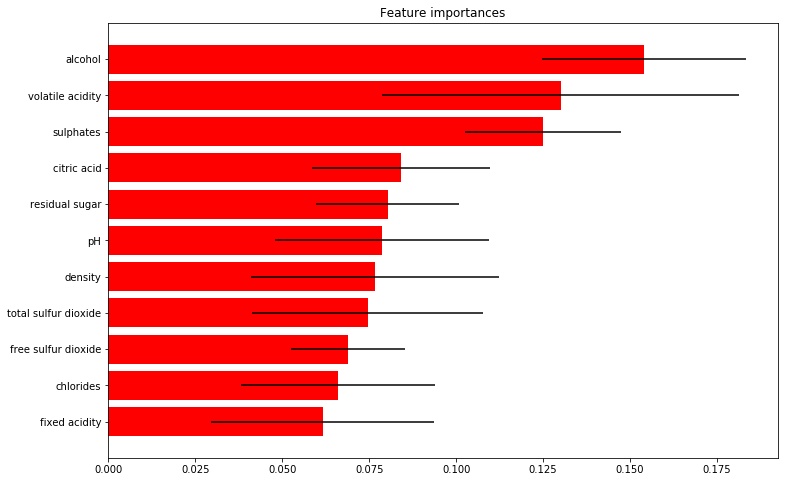

In [23]:
# Extract the feature importances using .feature_importances_ 
importances = rf.feature_importances_
print(X_train.columns)
print(importances)
# Plot
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure(figsize = (12, 8))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.show()